<a href="https://colab.research.google.com/github/Vatsi007/Machine-Learning/blob/main/GOLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gold Price Prediction


#Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the Dataset

In [4]:
data=pd.read_csv("gld_price_data (1).csv")
data


,Date,SPX,GLD,USO,SLV,EUR/USD
0,02-01-2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,03-01-2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,04-01-2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,07-01-2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,08-01-2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,08-05-2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,09-05-2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,10-05-2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,14-05-2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
data.columns.tolist()

['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

#Moving the GLD col to last

In [6]:
cols=[col for col in data.columns if col!='GLD']
cols.append('GLD')
data=data[cols]
data

,Date,SPX,USO,SLV,EUR/USD,GLD
0,02-01-2008,1447.160034,78.470001,15.1800,1.471692,84.860001
1,03-01-2008,1447.160034,78.370003,15.2850,1.474491,85.570000
2,04-01-2008,1411.630005,77.309998,15.1670,1.475492,85.129997
3,07-01-2008,1416.180054,75.500000,15.0530,1.468299,84.769997
4,08-01-2008,1390.189941,76.059998,15.5900,1.557099,86.779999
...,...,...,...,...,...,...
2285,08-05-2018,2671.919922,14.060000,15.5100,1.186789,124.589996
2286,09-05-2018,2697.790039,14.370000,15.5300,1.184722,124.330002
2287,10-05-2018,2723.070068,14.410000,15.7400,1.191753,125.180000
2288,14-05-2018,2730.129883,14.380000,15.5600,1.193118,124.489998


In [7]:
dff=data.drop('Date',axis=1)
dff


,SPX,USO,SLV,EUR/USD,GLD
0,1447.160034,78.470001,15.1800,1.471692,84.860001
1,1447.160034,78.370003,15.2850,1.474491,85.570000
2,1411.630005,77.309998,15.1670,1.475492,85.129997
3,1416.180054,75.500000,15.0530,1.468299,84.769997
4,1390.189941,76.059998,15.5900,1.557099,86.779999
...,...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789,124.589996
2286,2697.790039,14.370000,15.5300,1.184722,124.330002
2287,2723.070068,14.410000,15.7400,1.191753,125.180000
2288,2730.129883,14.380000,15.5600,1.193118,124.489998


#Displot GLD

<ipython-input-8-3f5bdf14e033>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

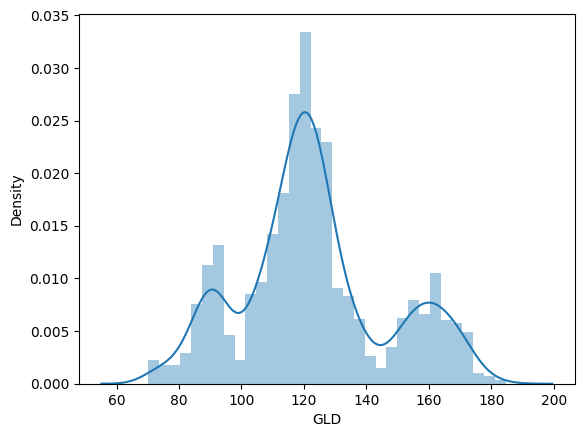

In [8]:
sns.distplot(data['GLD'])

#Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7a6ea3fdcf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6ea3fde190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a6ea3fdc5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6ea3fdf2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6ea3fdfc10>],
 'means': []}

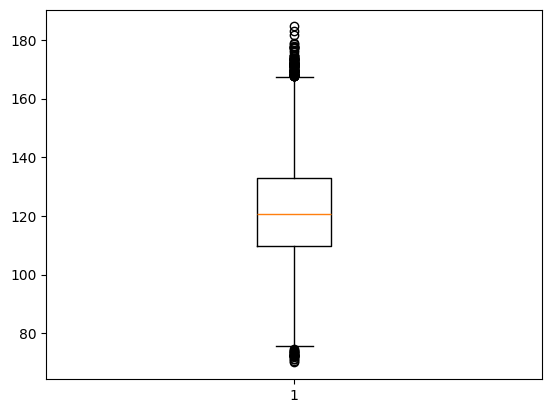

In [9]:
plt.boxplot(data['GLD'])

In [10]:
Q3=data['GLD'].quantile(0.75)
Q1=data['GLD'].quantile(0.25)
InterQuartileRange=Q3-Q1
print(Q3)
print(Q1)
print(InterQuartileRange)

132.84000400000002
109.72500025
23.115003750000028


In [11]:
lower_bound=Q1-1.5*InterQuartileRange
upper_bound=Q3+1.5*InterQuartileRange
print(lower_bound)
print(upper_bound)

75.05249462499995
167.51250962500006


{'whiskers': [<matplotlib.lines.Line2D at 0x7a6ea40273d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6ea4038790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a6ea4026c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6ea4039c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6ea403a510>],
 'means': []}

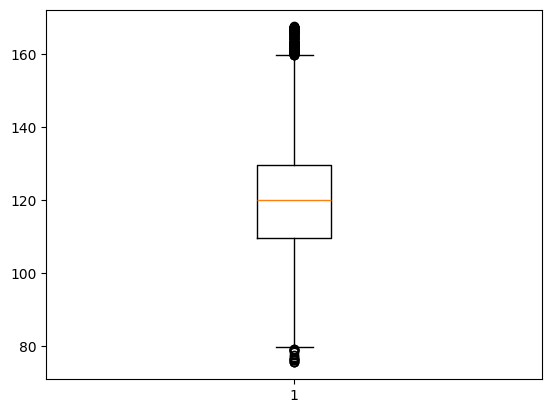

In [12]:
data_cleaned=data[(data['GLD'] <= upper_bound) & (data['GLD'] >= lower_bound)]
data_cleaned
plt.boxplot(data_cleaned['GLD'])

In [13]:
data_cleaned.describe()

,SPX,USO,SLV,EUR/USD,GLD
count,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000
mean,1676.567898,31.473419,19.575527,1.281066,121.184742
std,521.527228,19.868551,6.481641,0.133854,20.952468
min,676.530029,7.960000,9.180000,1.039047,75.480003
25%,1257.309998,13.390000,15.560000,1.148429,109.604999
50%,1640.459961,33.639999,17.129999,1.301406,120.029999
75%,2081.290039,37.715000,21.049999,1.370078,129.625000
max,2872.870117,117.480003,47.259998,1.598798,167.509995


In [14]:
data.describe()

,SPX,USO,SLV,EUR/USD,GLD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,31.842221,20.084997,1.283653,122.732875
std,519.111540,19.523517,7.092566,0.131547,23.283346
min,676.530029,7.960000,8.850000,1.039047,70.000000
25%,1239.874969,14.380000,15.570000,1.171313,109.725000
50%,1551.434998,33.869999,17.268500,1.303297,120.580002
75%,2073.010070,37.827501,22.882500,1.369971,132.840004
max,2872.870117,117.480003,47.259998,1.598798,184.589996


#Heatmap

In [15]:
dff=data_cleaned.drop('Date',axis=1)


<Axes: >

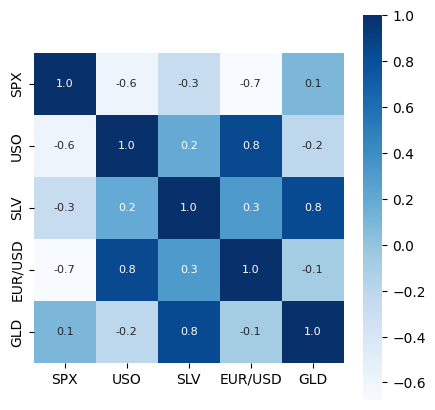

In [16]:
cor=dff.corr()
plt.figure(figsize=(5,5))
sns.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#Independent Variable

In [17]:
X=data_cleaned.drop(columns=['GLD','Date'],axis=1)
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


#Dependent Variable

In [18]:
Y=data_cleaned['GLD']
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


#Training and Testing

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train

,SPX,USO,SLV,EUR/USD
279,865.299988,29.290001,12.060000,1.304495
2249,2786.570068,12.470000,15.630000,1.230663
579,1080.290039,32.950001,18.959999,1.280295
1278,1762.969971,33.669998,20.900000,1.351698
2132,2465.540039,10.040000,16.870001,1.192777
...,...,...,...,...
1753,2073.070068,10.990000,13.490000,1.093625
1210,1640.459961,36.410000,18.420000,1.287101
1245,1671.709961,38.939999,22.840000,1.325803
1409,1911.910034,38.139999,18.360001,1.363698


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model1=RandomForestRegressor(random_state=42)



grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)


print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


#Random Forest Model

In [41]:
model1=RandomForestRegressor(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=200,random_state=42)
model1.fit(X_train,Y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [42]:
y_predict_test=model1.predict(X_test)
y_predict_train=model1.predict(X_train)

In [43]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
score1=r2_score(Y_test,y_predict_test)
print("The r2s with RandomForest is ",score1)


The r2s with RandomForest is  0.9918121094562475


In [47]:
mae_train=mean_absolute_error(Y_train,y_predict_train)
mse_train=mean_squared_error(Y_train,y_predict_train)
print("The Mean Absolute Error is",mae_train)
print("The Mean Squared Error is",mse_train)

The Mean Absolute Error is 0.4454992180989733
The Mean Squared Error is 0.6352536780469731


In [46]:
mae=mean_absolute_error(Y_test,y_predict_test)
mse=mean_squared_error(Y_test,y_predict_test)
print("The Mean Absolute Error is",mae)
print("The Mean Squared Error is",mse)

The Mean Absolute Error is 1.0919798238692788
The Mean Squared Error is 3.265004616637342


#Best Fit Line

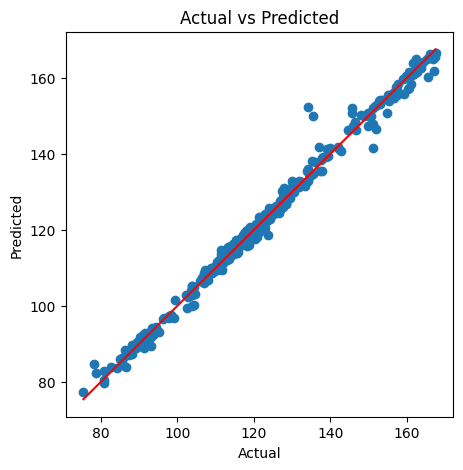

In [48]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test,y_predict)
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red',linestyle='solid')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

#Prediction

In [49]:
input=[1411.630005,77.309998,15.1670,1.475492]
input_array=np.asarray(input)
input_reshape=input_array.reshape(1,-1)
prediction=model1.predict(input_reshape)
print(prediction)

[85.27519812]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
